In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

sns.set(style="whitegrid")

In [3]:
customer_df = joblib.load("../artifacts/customer_with_clusters.pkl")
features_scaled = joblib.load("../artifacts/customer_features_scaled.pkl")
kmeans = joblib.load("../artifacts/kmeans_model.pkl")

print("Data & model loaded")


Data & model loaded


Compute Distance to Cluster Centroid

In [4]:
centroids = kmeans.cluster_centers_
print("centroids",centroids)
# Distance from each customer to all centroids
distances = pairwise_distances(features_scaled, centroids)
print("distances",distances)
# Distance to assigned cluster centroid
assigned_cluster = customer_df["Cluster"].values
print("arrang",(np.arange(len(distances)), assigned_cluster))

print("distance_to_centroid",distances[np.arange(len(distances)), assigned_cluster])
distance_to_centroid = distances[np.arange(len(distances)), assigned_cluster]

customer_df["DistanceToCentroid"] = distance_to_centroid
customer_df.head()


centroids [[-0.5068917   0.02512146 -0.0419717  -0.03959599]
 [-0.85819871  7.94539154 20.2587325  17.53228447]
 [ 1.54790967 -0.34982317 -0.17090462 -0.18338548]
 [-0.74992776  5.01255009  3.68363396  4.20260275]]
distances [[17.0136391  15.20622863 16.97612629 12.90038504]
 [ 0.66142941 27.50593814  2.62318609  7.00858586]
 [ 0.43044781 27.84199795  1.804976    7.44247838]
 ...
 [ 0.52532213 28.31634591  2.39439237  7.92798999]
 [ 1.54839978 27.52135988  3.08411526  6.56103929]
 [ 0.22489723 27.96342758  2.07339361  7.59161109]]
arrang (array([   0,    1,    2, ..., 4335, 4336, 4337], shape=(4338,)), array([3, 0, 0, ..., 0, 0, 0], shape=(4338,), dtype=int32))
distance_to_centroid [12.90038504  0.66142941  0.43044781 ...  0.52532213  1.54839978
  0.22489723]


,CustomerID,Recency,Frequency,MonetaryValue,TotalQuantity,Cluster,DistanceToCentroid
0,12346.0,325,1,77183.60,74215,3,12.900385
1,12347.0,1,7,4310.00,2458,0,0.661429
2,12348.0,74,4,1797.24,2341,0,0.430448
3,12349.0,18,1,1757.55,631,0,0.509973
4,12350.0,309,1,334.40,197,2,0.631652


Inspect Distance Distribution

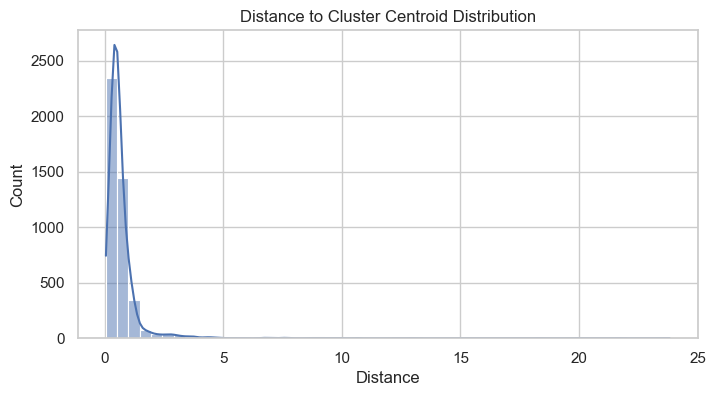

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(customer_df["DistanceToCentroid"], bins=50, kde=True)
plt.title("Distance to Cluster Centroid Distribution")
plt.xlabel("Distance")
plt.show()


Choose Anomaly Threshold

In [6]:
threshold = np.percentile(customer_df["DistanceToCentroid"], 95)
threshold

np.float64(1.478656747706525)

Flag Anomalies

In [7]:
customer_df["IsAnomaly"] = customer_df["DistanceToCentroid"] > threshold

customer_df["IsAnomaly"].value_counts()


IsAnomaly
False    4121
True      217
Name: count, dtype: int64

Inspect Anomalous Customers

In [8]:
anomalies = customer_df[customer_df["IsAnomaly"]]

anomalies.sort_values("DistanceToCentroid", ascending=False).head(10)


,CustomerID,Recency,Frequency,MonetaryValue,TotalQuantity,Cluster,DistanceToCentroid,IsAnomaly
1689,14646.0,1,73,280206.02,196915,1,23.815105,True
326,12748.0,0,209,33719.73,25747,3,21.596930,True
1879,14911.0,0,201,143825.06,80265,1,18.270555,True
0,12346.0,325,1,77183.60,74215,3,12.900385,True
4010,17841.0,1,124,40991.57,23071,3,10.564289,True
3771,17511.0,2,31,91062.38,64549,3,10.529542,True
4201,18102.0,0,60,259657.30,64124,1,9.832626,True
1333,14156.0,9,55,117379.63,57885,1,9.830999,True
55,12415.0,23,21,124914.53,77374,1,9.093457,True
996,13694.0,3,50,65039.62,63312,3,8.814348,True


Visualize Anomalies on Cluster Plot - obvious and intuitive

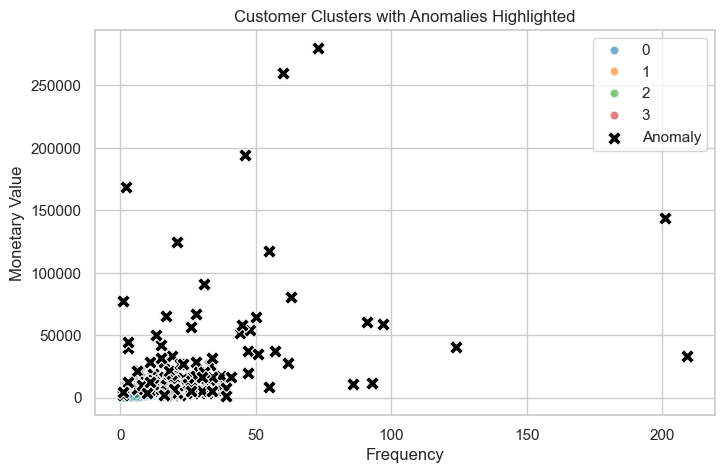

In [9]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    x=customer_df["Frequency"],
    y=customer_df["MonetaryValue"],
    hue=customer_df["Cluster"],
    palette="tab10",
    alpha=0.6
)

sns.scatterplot(
    x=anomalies["Frequency"],
    y=anomalies["MonetaryValue"],
    color="black",
    marker="X",
    s=100,
    label="Anomaly"
)

plt.title("Customer Clusters with Anomalies Highlighted")
plt.xlabel("Frequency")
plt.ylabel("Monetary Value")
plt.legend()
plt.show()


In [10]:
joblib.dump(customer_df, "../artifacts/customer_with_anomalies.pkl")
print("Anomaly detection results saved")


Anomaly detection results saved
